# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy import stats as st
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import OrdinalEncoder 

## Загрузка и подготовка данных

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [3]:
for column in geo_data_0.columns:
    print('Уникальные значения столбца', column)
    print(geo_data_0[column].unique())

Уникальные значения столбца id
['txEyH' '2acmU' '409Wp' ... '3rnvd' '7kl59' '1CWhH']
Уникальные значения столбца f0
[0.70574498 1.33471129 1.02273226 ... 1.02958465 0.99816289 1.76475393]
Уникальные значения столбца f1
[-0.4978225  -0.34016425  0.15199044 ...  0.01878693 -0.52858167
 -0.26641676]
Уникальные значения столбца f2
[ 1.22116995  4.36508033  1.41992624 ... -1.34830814  1.58386866
  5.72284937]
Уникальные значения столбца product
[105.28006184  73.03775027  85.26564713 ...  64.37544259  74.04076435
 149.63324561]


In [4]:
geo_data_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [5]:
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
for column in geo_data_1.columns:
    print('Уникальные значения столбца', column)
    print(geo_data_0[column].unique())

Уникальные значения столбца id
['txEyH' '2acmU' '409Wp' ... '3rnvd' '7kl59' '1CWhH']
Уникальные значения столбца f0
[0.70574498 1.33471129 1.02273226 ... 1.02958465 0.99816289 1.76475393]
Уникальные значения столбца f1
[-0.4978225  -0.34016425  0.15199044 ...  0.01878693 -0.52858167
 -0.26641676]
Уникальные значения столбца f2
[ 1.22116995  4.36508033  1.41992624 ... -1.34830814  1.58386866
  5.72284937]
Уникальные значения столбца product
[105.28006184  73.03775027  85.26564713 ...  64.37544259  74.04076435
 149.63324561]


In [7]:
geo_data_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [8]:
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
for column in geo_data_2.columns:
    print('Уникальные значения столбца', column)
    print(geo_data_0[column].unique())

Уникальные значения столбца id
['txEyH' '2acmU' '409Wp' ... '3rnvd' '7kl59' '1CWhH']
Уникальные значения столбца f0
[0.70574498 1.33471129 1.02273226 ... 1.02958465 0.99816289 1.76475393]
Уникальные значения столбца f1
[-0.4978225  -0.34016425  0.15199044 ...  0.01878693 -0.52858167
 -0.26641676]
Уникальные значения столбца f2
[ 1.22116995  4.36508033  1.41992624 ... -1.34830814  1.58386866
  5.72284937]
Уникальные значения столбца product
[105.28006184  73.03775027  85.26564713 ...  64.37544259  74.04076435
 149.63324561]


In [10]:
geo_data_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

В данных отсутсвуют пропуски.

Изучим гистограммы по столбцу product.

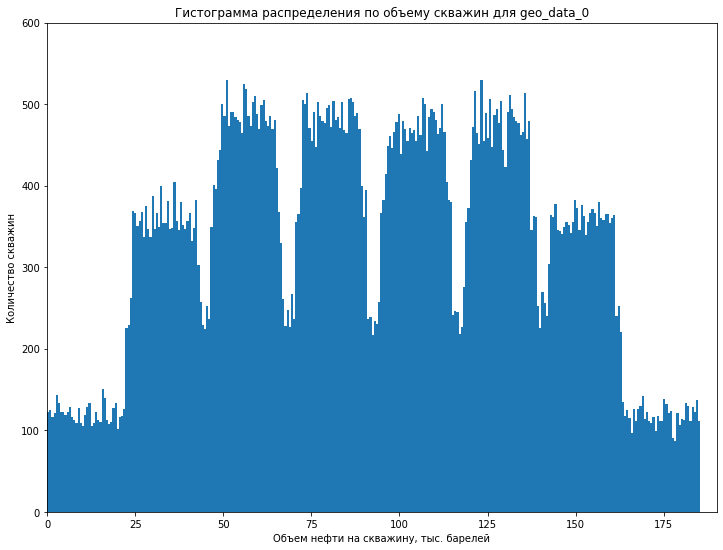

In [11]:
plt.figure(figsize=[12,9])
plt.hist(geo_data_0['product'], bins=300)
plt.xlim([0,190])
plt.ylim([0,600])
plt.xlabel("Объем нефти на скважину, тыс. барелей")
plt.ylabel("Количество скважин")
plt.title("Гистограмма распределения по объему скважин для geo_data_0")
plt.show()

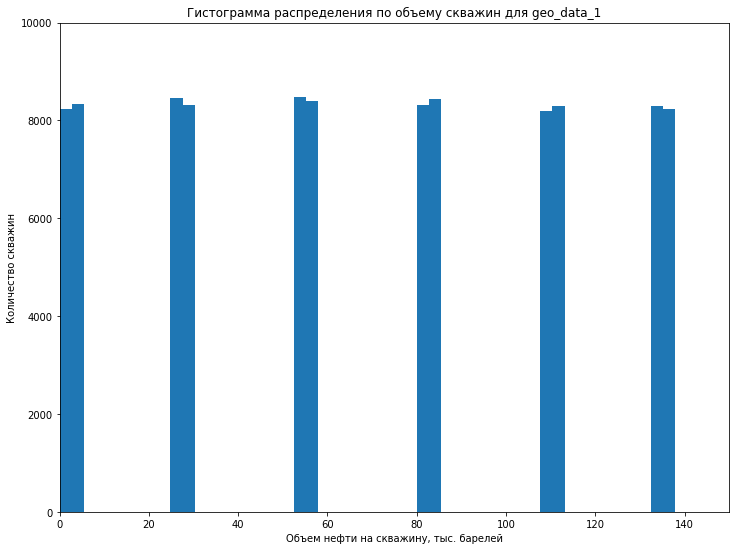

In [12]:
plt.figure(figsize=[12,9])
plt.hist(geo_data_1['product'], bins=50)
plt.xlim([0,150])
plt.ylim([0,10000])
plt.xlabel("Объем нефти на скважину, тыс. барелей")
plt.ylabel("Количество скважин")
plt.title("Гистограмма распределения по объему скважин для geo_data_1")
plt.show()

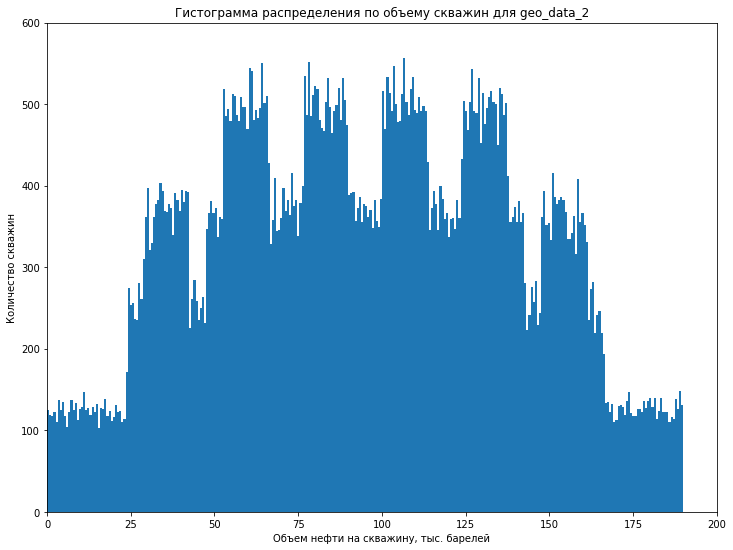

In [13]:
plt.figure(figsize=[12,9])
plt.hist(geo_data_2['product'], bins=300)
plt.xlim([0,200])
plt.ylim([0,600])
plt.xlabel("Объем нефти на скважину, тыс. барелей")
plt.ylabel("Количество скважин")
plt.title("Гистограмма распределения по объему скважин для geo_data_2")
plt.show()

**Вывод**

- Данные загружены и изучены.
- Пропусков нет.
- По гистограммам видно, что у 1-го и 3-го регионов распределение скважин близкое к нормальному. 
- Во 2-м регионе данные имеют странное распределение: около 5000 баррелей с шагом по 15-20 тыс. баррелей. Данные не подчиняются ЗБЧ и скорее всего были введены искуственно.

## Обучение и проверка модели

In [14]:
encoder_0 = OrdinalEncoder() 
encoder_0.fit(geo_data_0)
geo_data_ordinal_0 = pd.DataFrame(encoder_0.transform(geo_data_0), columns=geo_data_0.columns)
geo_data_0['id'] = (geo_data_ordinal_0['id']).astype('int')
geo_data_0.head()

,id,f0,f1,f2,product
0,90195,0.705745,-0.497823,1.221170,105.280062
1,4259,1.334711,-0.340164,4.365080,73.037750
2,6574,1.022732,0.151990,1.419926,85.265647
3,71446,-0.032172,0.139033,2.978566,168.620776
4,54252,1.988431,0.155413,4.751769,154.036647


In [15]:
encoder_1 = OrdinalEncoder() 
encoder_1.fit(geo_data_1)
geo_data_ordinal_1 = pd.DataFrame(encoder_1.transform(geo_data_1), columns=geo_data_1.columns)
geo_data_1['id'] = (geo_data_ordinal_1['id']).astype('int')
geo_data_1.head()

,id,f0,f1,f2,product
0,74613,-15.001348,-8.276000,-0.005876,3.179103
1,9753,14.272088,-3.475083,0.999183,26.953261
2,93502,6.263187,-5.948386,5.001160,134.766305
3,33405,-13.081196,-11.506057,4.999415,137.945408
4,16486,12.702195,-8.147433,5.004363,134.766305


In [16]:
encoder_2 = OrdinalEncoder() 
encoder_2.fit(geo_data_2)
geo_data_ordinal_2 = pd.DataFrame(encoder_2.transform(geo_data_2), columns=geo_data_2.columns)
geo_data_2['id'] = (geo_data_ordinal_2['id']).astype('int')
geo_data_2.head()

,id,f0,f1,f2,product
0,67731,-1.146987,0.963328,-0.828965,27.758673
1,52297,0.262778,0.269839,-2.530187,56.069697
2,82167,0.194587,0.289035,-5.586433,62.871910
3,84060,2.236060,-0.553760,0.930038,114.572842
4,52441,-0.515993,1.716266,5.899011,149.600746


**Разобьём данные на обучающую и валидационную выборки в соотношении 75:25**

In [17]:
target_0=geo_data_0['product']
features_0=geo_data_0.drop(['product'], axis=1)

target_1=geo_data_1['product']
features_1=geo_data_1.drop(['product'], axis=1)

target_2=geo_data_2['product']
features_2=geo_data_2.drop(['product'], axis=1)

In [18]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size=0.25, random_state=42)

In [19]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size=0.25, random_state=42)

In [20]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size=0.25, random_state=42)

**Обучим модель и сделаем предсказания на валидационной выборке**

In [21]:
def get_metrics(target_valid, predicted_valid):
    metrics = {}
    metrics['mse'] =  round(mean_squared_error(target_valid, predicted_valid),4)
    metrics['rmse'] =  round(metrics['mse'] ** 0.5,4)
    metrics["predicted_valid"] = predicted_valid
    metrics["target_valid"] = target_valid
    return metrics

**1 регион**

In [22]:
model_0=LinearRegression()
model_0.fit(features_train_0,target_train_0)
predict_0=model_0.predict(features_valid_0)

In [23]:
metrics_0 = get_metrics(target_valid_0, predict_0)

**2 регион**

In [24]:
model_1=LinearRegression()
model_1.fit(features_train_1,target_train_1)
predict_1=model_1.predict(features_valid_1)

In [25]:
metrics_1 = get_metrics(target_valid_1, predict_1)

**3 регион**

In [26]:
model_2=LinearRegression()
model_2.fit(features_train_2,target_train_2)
predict_2=model_2.predict(features_valid_2)

In [27]:
metrics_2 = get_metrics(target_valid_2, predict_2)

In [28]:
comparison_table = pd.DataFrame(
    index=['Средний запас предсказанного сырья','RMSE'], 
    columns=['1 регион','2 регион','3 регион'])
comparison_table['1 регион'] = predict_0.mean(), metrics_0["rmse"]
comparison_table['2 регион'] = predict_1.mean(), metrics_1["rmse"]
comparison_table['3 регион'] = predict_2.mean(), metrics_2["rmse"]
comparison_table

,1 регион,2 регион,3 регион
Средний запас предсказанного сырья,92.399126,68.712878,94.772268
RMSE,37.756800,0.890300,40.145700


**Вывод**

- Модели обучены и проверены на качество предсказания метрикой **RMSE**. 
- Величина RMSE во втором регионе сильно отличается от двух других;
это связано с тем, что модель обучилась на практически равных по величине данных, и величина ошибки этой модели не может сильно варьироваться.

## Подготовка к расчёту прибыли

- Исследуем 500 точек, выберем 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- Один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей средней прибылью.

In [29]:
BUDGET = 10000000 # Бюджет на разработку скважин в регионе, тыс.руб
INCOME_ONE_PROD = 450 # Доход с каждой единицы продукта, тыс.руб
target_probability_losses = 0.025 # вероятность убытков
product_mean_0 = geo_data_0['product'].mean()
product_mean_1 = geo_data_1['product'].mean()
product_mean_2 = geo_data_2['product'].mean()

In [30]:
print('Cредний запас сырья в 1 регионе: %.2f млн.баррелей'%product_mean_0)
print('Cредний запас сырья в 2 регионе: %.2f млн.баррелей'%product_mean_1)
print('Cредний запас сырья в 3 регионе: %.2f млн.баррелей'%product_mean_2)

Cредний запас сырья в 1 регионе: 92.50 млн.баррелей
Cредний запас сырья в 2 регионе: 68.83 млн.баррелей
Cредний запас сырья в 3 регионе: 95.00 млн.баррелей


**Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины**

In [31]:
budget_count = BUDGET/200
v_prod = budget_count/INCOME_ONE_PROD
v_prod

111.11111111111111

**Сравним полученный объём сырья со средним запасом в каждом регионе**

In [32]:
print('Средний запас фактичекой нефти на скважину в регионе 1', geo_data_0['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 2', geo_data_1['product'].mean())
print('Средний запас фактичекой нефти на скважину в регионе 3', geo_data_2['product'].mean())

Средний запас фактичекой нефти на скважину в регионе 1 92.50000000000001
Средний запас фактичекой нефти на скважину в регионе 2 68.82500000000002
Средний запас фактичекой нефти на скважину в регионе 3 95.00000000000004


**Вывод**

- Изучены средние фактические запасы. 
- Для первого и третьего регионов - высокая вероятность окупить затраты. Существует достаточно много скважин, где запасы больше необходимого среднего.
- Для второго региона - значений больше 111 достаточно много и можно выбрать только лучшие в этой выборке.

## Расчёт прибыли и рисков 

In [33]:
region_df0 = pd.DataFrame(metrics_0["target_valid"])
region_df0['predicted'] = metrics_0["predicted_valid"]
region_df0['profit'] = metrics_0["target_valid"] * INCOME_ONE_PROD
region_df0['region'] = 0

region_df1 = pd.DataFrame(metrics_1["target_valid"])
region_df1['predicted'] = metrics_1["predicted_valid"]
region_df1['profit'] = metrics_1["target_valid"] * INCOME_ONE_PROD
region_df1['region'] = 1

region_df2 = pd.DataFrame(metrics_2["target_valid"])
region_df2['predicted'] = metrics_2["predicted_valid"]
region_df2['profit'] = metrics_2["target_valid"] * INCOME_ONE_PROD
region_df2['region'] = 2

**Выберем скважины с максимальными значениями предсказаний**

In [34]:
max_pred_df0 = region_df0.sort_values(by='predicted', ascending=False)[:200]
max_pred_df0

,product,predicted,profit,region
46784,153.639837,176.583603,69137.926690,0
27658,140.631646,176.280262,63284.240894,0
6496,178.879516,173.285331,80495.782405,0
65743,176.807828,172.846546,79563.522555,0
93716,130.985681,172.666622,58943.556555,0
...,...,...,...,...
65549,162.142530,146.982832,72964.138624,0
9462,120.536962,146.980565,54241.632844,0
39838,138.424174,146.952343,62290.878428,0
65925,136.027691,146.923467,61212.460945,0


In [35]:
max_pred_df1 = region_df1.sort_values(by='predicted', ascending=False)[:200]
max_pred_df1

,product,predicted,profit,region
80439,137.945408,139.981970,62075.433483,1
14041,137.945408,139.698618,62075.433483,1
62413,137.945408,139.616104,62075.433483,1
55563,137.945408,139.517149,62075.433483,1
42432,137.945408,139.474323,62075.433483,1
...,...,...,...,...
99088,137.945408,138.429757,62075.433483,1
5058,137.945408,138.427348,62075.433483,1
80836,137.945408,138.424756,62075.433483,1
77320,137.945408,138.424544,62075.433483,1


In [36]:
max_pred_df2 = region_df2.sort_values(by='predicted', ascending=False)[:200]
max_pred_df2

,product,predicted,profit,region
43931,101.225039,170.665654,45551.267442,2
84047,151.655778,169.610555,68245.099934,2
54085,92.947333,165.235884,41826.299828,2
89165,97.775979,164.789208,43999.190604,2
64380,122.460897,164.006269,55107.403490,2
...,...,...,...,...
25434,179.654566,142.593370,80844.554650,2
69600,121.983862,142.553995,54892.737710,2
66721,165.966133,142.532388,74684.759774,2
50983,128.032050,142.481133,57614.422279,2


**Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям**

In [37]:
sum_oil_df0 = max_pred_df0['product'].sum()
print(f'Целевое значение объёма сырья geo_data_0: %.1f тыс.баррелей'%sum_oil_df0)
sum_oil_df1 = max_pred_df1['product'].sum()
print(f'Целевое значение объёма сырья geo_data_1: %.1f тыс.баррелей'%sum_oil_df1)
sum_oil_df2 = max_pred_df2['product'].sum()
print(f'Целевое значение объёма сырья geo_data_2: %.1f тыс.баррелей'%sum_oil_df2)

Целевое значение объёма сырья geo_data_0: 29687.0 тыс.баррелей
Целевое значение объёма сырья geo_data_1: 27589.1 тыс.баррелей
Целевое значение объёма сырья geo_data_2: 27940.0 тыс.баррелей


In [38]:
profit_df0 = round(((sum_oil_df0 * INCOME_ONE_PROD) - BUDGET)/1000000000,2)
print('Прибыль для полученного объёма сырья geo_data_0: {:.2f} млрд.руб.'.format(profit_df0))
profit_df1 = round(((sum_oil_df1 * INCOME_ONE_PROD) - BUDGET)/1000000000,2)
print('Прибыль для полученного объёма сырья geo_data_1: {:.2f} млрд.руб.'.format(profit_df1))
profit_df2 = round(((sum_oil_df2 * INCOME_ONE_PROD) - BUDGET)/1000000000,2)
print('Прибыль для полученного объёма сырья geo_data_2: {:.2f} млрд.руб.'.format(profit_df2))

Прибыль для полученного объёма сырья geo_data_0: 0.00 млрд.руб.
Прибыль для полученного объёма сырья geo_data_1: 0.00 млрд.руб.
Прибыль для полученного объёма сырья geo_data_2: 0.00 млрд.руб.


## Посчитаем риски и прибыль для каждого региона

**Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли**

In [39]:
def profit_for_vp2(predict,target,count):
    probs_sorted = pd.Series(predict).sort_values(ascending=False)
    selected_points = target[probs_sorted.index][:count]
    product = selected_points.sum()
    revenue = product * INCOME_ONE_PROD
    return revenue - BUDGET

In [47]:
def bootstap_1000(target,predict):
    values = []
    count=0
    state = np.random.RandomState(12345)
    predict_e = pd.Series(predict, index=target.index)
    
    for i in tqdm(range(1000)):
        target_subsample = target.sample(n=500,replace=True, random_state=state)
  
        probs_subsample = predict_e[target_subsample.index]
        values.append(profit_for_vp2(probs_subsample,target_subsample, 200))  

            
    values = pd.Series(values)
    mean = values.mean()
    loss = values[values<0]
    plt.title('Распределение прибыли')
    values.plot(kind="hist", grid=True, figsize=(8,5))
    plt.xlabel('Прибыль, тыс.руб')
    plt.ylabel('Количество')
    plt.show()
    
    low_95 = values.quantile(0.025)
    high_95 = values.quantile(0.975)
    
    print("Средняя прибыль: {:.2f} млн.руб".format(mean/1000))
    print("95%-ый доверительный интервал: от {:.2f} млн.руб до {:.2f} млн.руб".format(low_95,high_95))
    print ('Процент вероятности убытка в данном регионе составит {:.2%}'.format(loss.count()/len(values)))

**Регион 0**

  0%|          | 0/1000 [00:00<?, ?it/s]

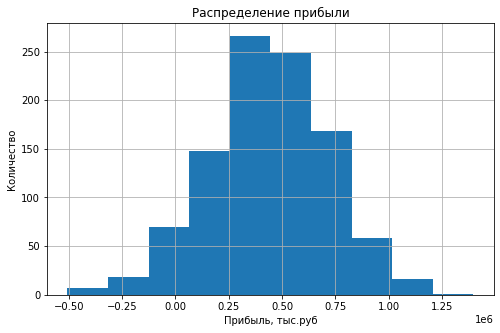

Средняя прибыль: 435.84 млн.руб
95%-ый доверительный интервал: от -124968.73 млн.руб до 966504.18 млн.руб
Процент вероятности убытка в данном регионе составит 6.20%


In [49]:
bootstap_1000(target_valid_0, predict_0)

**Регион 1**

  0%|          | 0/1000 [00:00<?, ?it/s]

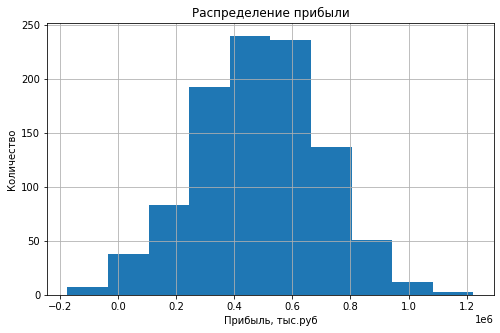

Средняя прибыль: 489.66 млн.руб
95%-ый доверительный интервал: от 55116.18 млн.руб до 905762.65 млн.руб
Процент вероятности убытка в данном регионе составит 1.10%


In [50]:
bootstap_1000(target_valid_1,predict_1)

**Регион 2**

  0%|          | 0/1000 [00:00<?, ?it/s]

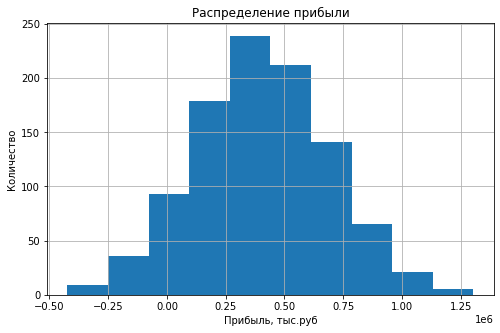

Средняя прибыль: 403.95 млн.руб
95%-ый доверительный интервал: от -142153.28 млн.руб до 958286.80 млн.руб
Процент вероятности убытка в данном регионе составит 7.00%


In [51]:
bootstap_1000(target_valid_2,predict_2)

**Оставим лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выберем регион с наибольшей средней прибылью.**

**Вывод**

- Самый прибыльный регион- второй. (489.7 млн руб)
- У первого и третьего регионов вероятность убытка больше 2.5%, следовательно они нам не подходят.

## Вывод

- Исследовали данные по запасам в скважинах трёх регионов.
- Мы обучили модель и выполнили предсказания при помощи линейной регрессии, а так же применили технологию bootstrap с разделением каждого предсказанного значения прибыли по регионам на 1000 выборок.
- По результату полученных данных мы определили доверительный интревал получения прибыли в 95%, ограничили вероятность убытка величиной менее 2,5%. И на основе этих данных смогли выбрать более перспективный регион для разработки 200 скважин.
- Сделали выбор в сторону разработки 200 скважин во 2 регионе.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован